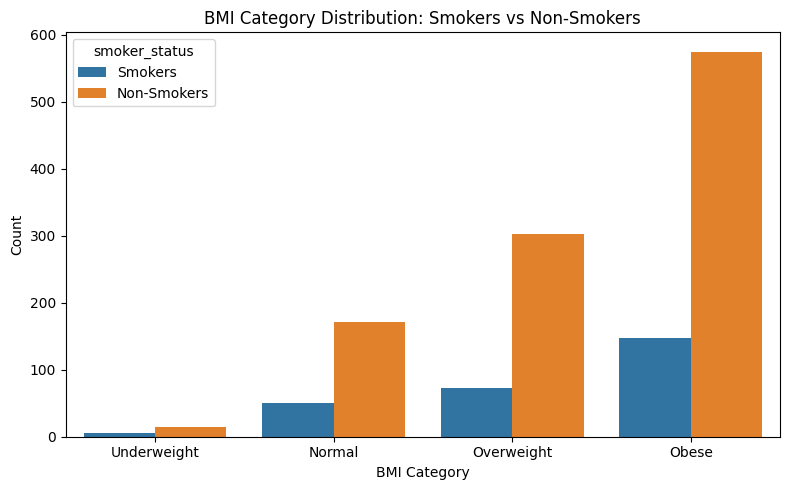

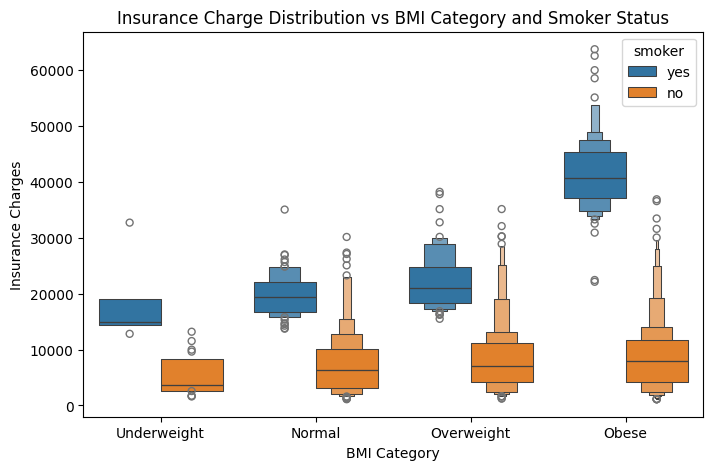

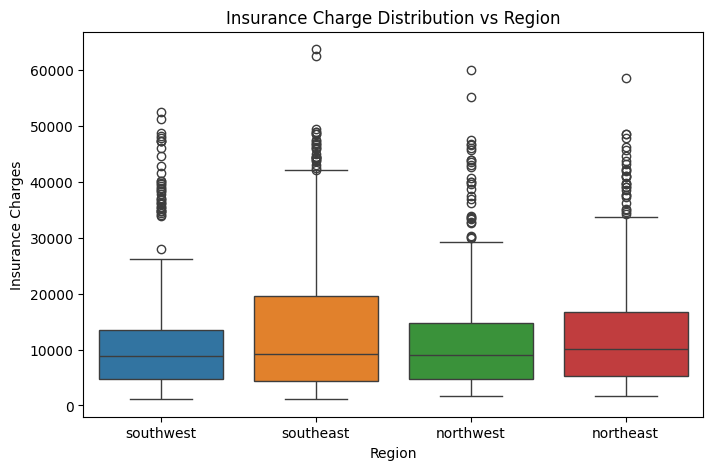

c:\Users\meet_\OneDrive\Documents\vscode-projects\My-Individual-Project\.venv\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



KeyError: ('smoker', 'sex')

In [ ]:
#using the insurance.csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder



df= pd.read_csv(r"C:\\Users\meet_\OneDrive\Documents\vscode-projects\My-Individual-Project\jupyter_notebooks\Source Data\insurance.csv")
df = df.copy()
df.head()

# df.isnull().sum()
# df.shape
# df.info()

df['smoker'] = df['smoker'].str.lower()

#Hypothesis 1 = Smoking has a direct impact on weight gain

""" 
Function to group BMI values in line with NHS defintions

"""

def bmi_group(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 24.9:
        return "Normal"
    elif 25 <= bmi < 29.9:
        return "Overweight"
    else:
        return "Obese"
    
#add a new column in the df to group the bmi values
df["bmi_category"] = df["bmi"].apply(bmi_group)
df.head(25)

bmi_order = ["Underweight","Normal","Overweight","Obese"]
df["bmi_category"] = pd.Categorical(df["bmi_category"],categories=bmi_order,ordered = True)

"""
Function to return a count of the bmi category for smokers
"""
def smoker_bmi_count(df): 
     smokers = df[df['smoker'] == "yes"]
     vc = smokers["bmi_category"].value_counts().reset_index()
     vc.columns = ["bmi_category","count_smoker"]
     return vc

"""
Function to return a count of the bmi category for nonsmokers
"""
def nonsmoker_bmi_count(df): 
     non_smokers = df[df['smoker'] == "no"]
     vc = non_smokers["bmi_category"].value_counts().reset_index()
     vc.columns = ["bmi_category","count_nonsmoker"]
     return vc    



smoker_bmi_df = smoker_bmi_count(df)
nonsmoker_bmi_df = nonsmoker_bmi_count(df)

"""
# Create a combined DataFrame to check bmi categories for both smokers and non smokers
# """

combined_df = pd.merge(
    smoker_bmi_df,
    nonsmoker_bmi_df,
    on="bmi_category",
    how="outer",
)

combined_df



# Melt the DataFrame to long format for Seaborn
df_long = combined_df.melt(id_vars='bmi_category', 
                           value_vars=['count_smoker','count_nonsmoker'], 
                           var_name='smoker_status', 
                           value_name='count')

#Rename values for clarity
df_long['smoker_status'] = df_long['smoker_status'].replace({
    'count_smoker': 'Smokers',
    'count_nonsmoker': 'Non-Smokers'
})

# Plot a bar chart to compare BMI category dsistribution for Smokers vs Non Smokers
plt.figure(figsize=(8,5))
sns.barplot(data=df_long, x='bmi_category', y='count', hue='smoker_status')
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.title("BMI Category Distribution: Smokers vs Non-Smokers")
plt.tight_layout()
plt.show()

#Hypothesis 1 result --> Clearly, smoking has no impact on being obese or overweight


# Hypothesis 2: BMI category has a direct impact on insurance charges

plt.figure(figsize=(8,5))
sns.boxenplot(data=df, x='bmi_category',y='charges', hue='smoker')
plt.xlabel('BMI Category')
plt.ylabel('Insurance Charges')
plt.title('Insurance Charge Distribution vs BMI Category and Smoker Status')
plt.tight_layout
plt.show()

#Hypothesis 2 result --> Smokers do get charged more vs non smokers, and also that the more weight a smoker puts on,
#  the risk of making a health claim increases, which is reflected in higher charges by client

# Hypothesis 3: Insurance Charges vs Region

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='region',y='charges', hue='region')
plt.xlabel('Region')
plt.ylabel('Insurance Charges')
plt.title('Insurance Charge Distribution vs Region')
plt.tight_layout
plt.show()

#Hypothesis 4 Age has a strong correlation with insurance charges, and that BMI and smoker status will augment the risk factor

""" 
Function to create age groups

"""

def age_group(age):
    if age < 12:
        return "Child"
    elif 13 <= age < 20:
        return "Teen"
    elif 20 <= age < 60:
        return "Adult"
    else:
        return "Senior"
    

    #add a new column in the df for age group
df["age_group"] = df["age"].apply(age_group)
df["age_group"] = df["age_group"].astype(str)
df.head(25)

fig = px.box(
    df,
    x="age_group",
    y="charges",
    color="sex",
    labels = {"age_group":"Age Group",
          "charges":"Insurance Charge"
          },
title = "Interactive Boxplot for Insurance Charge vs Age Group and Gender",
hover_name = "region"
)


# Layout improvements
fig.update_layout(
    xaxis_tickangle=-45,
    template="plotly_white",
    title_font_size=20,
    margin=dict(l=50, r=50, t=80, b=50)
)

fig.show()

# A second interactive plot (Scatter) to showcase the relationship between Smoker + BMI and Charges
fig = px.scatter(
    df, 
    x = "age_group",
    y = "charges",
    color = "bmi_category",
    facet_col="region",
    facet_row="smoker",
    title = "Insurance Charges by Age Group, Smoker Status and Region"
      )

fig.show()

# Final plot using heatmap to show the strong correlation between Charges vs Smoker and BMI

 # Encode binmary variables

le_smoker = LabelEncoder()
le_sex = LabelEncoder()
df["smoker_encoded"]=le_smoker.fit_transform(df["smoker"])
df["sex_encoded"]=le_sex.fit_transform(df["sex"])

# Ordinal encode bmi category

bmi_mapping = {"Underweight":0,"Normal":1,"Overweight":2,"Obese":3}
df["bmi_encoded"] = df["bmi_category"].map(bmi_mapping)

# OneHotEncode for region

ohe_region = OneHotEncoder(drop="first", sparse_output=False)
region_encoded = pd.DataFrame(
    ohe_region.fit_transform(df[["region"]]),
    columns=ohe.get_feature_names_out(["region"])
)

ohe_age = OneHotEncoder(drop="first", sparse_output=False)
age_group_encoded = pd.DataFrame(
    ohe_age.fit_transform(df[["age_group"]]),
    columns=ohe.get_feature_names_out(["age_group"])
)

df_corr = pd.concat([df,region_encoded,age_group_encoded],axis=1)

df_corr = df_corr.drop(["sex", "smoker", "bmi_category", "region","age_group"], axis=1)

corr_matrix = df_corr.corr()

fig = px.imshow(corr_matrix,
                text_auto=True,
                color_continuous_scale="RdBu_r",
                color_continuous_midpoint=0,
                title="Correlation Heatmap"
                )

fig.update_layout(width = 900,height = 700)
fig.show()

